In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
np.seterr(divide='ignore' , invalid='ignore')
import warnings
warnings.filterwarnings("ignore")

## ESPLORAZIONE DEI DATI

L' obbiettivo del progetto è quello di predire, utilizzando una variabile discreta binaria, se una persona abbia avuto o no un arresto cardiaco.
Il dataset in esame contiene informazioni sugli arresti cardiaci di differenti persone.

La prima cosa da effettuare è caricare i dati in un dataframe Pandas visualizzandone una parte per capirne struttura e distribuzione.

In [178]:
dataset=pd.read_csv('heart.csv')

In [89]:
dataset.tail()

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
913    132              N      1.2     Flat             1  
914    141              N      3.4     Flat             1  
915    115              Y      1.2     Flat             1  
916    174              N      0.0     Flat             1  
917    173              N      0.0       Up             0

In [90]:
dataset.head()

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0

## SIGNIFICATO DELLE FEATURE

Il dataframe si compone di 12 colonne, ovvero:
-  **Age**: età del paziente espressa in anni
-  **Sex**: indica il sesso del paziente[M:Uomo, F:Donna].
- **ChestPainType**: è una colonna che contiene il tipo di dolore toracico provato dal paziente in esame[TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic].
- **RestingBP**: pressione sanguigna a riposo.
- **Cholesterol**: colesterolo sierico.
- **FastingBS**: glicemia a digiuno [1: se a digiuno BS > 120 mg/dl, 0: altrimenti].
- **RestingECG**: risultati dell'elettrocardiogramma a riposo [Normale: normale, ST: con anomalia dell'onda ST-T (inversioni dell'onda T e/o sopraslivellamento o depressione dell'ST > 0,05 mV), LVH: con ipertrofia ventricolare sinistra probabile o definita secondo i criteri di Estes].
- **MaxHR**: frequenza cardiaca massima raggiunta[valore numerico fra 60 e 202].
- **ExerciseAngina**: angina da esercizio.
- **Oldpeak**: "vecchio picchio" depressione del segmento ST indotta dall'esercizio rispetto al riposo ("ST" si riferisce alle posizioni sul diagramma ECG, e rappresenta il periodo in cui i ventricoli sono depolarizzati).
- **ST_Slope**: la pendenza del segmento ST di picco di esercizio [Su: in salita, Piatto: in piano, In discesa: in discesa].
- **HeartDisease**: indica se un paziente soffre oppure no di cardiopatia[1: cardiopatia, 0:normale].

La variabile binaria **HeartDisease** corrisponde all'incognita da scoprire, che assumerà valore 1 nel caso in cui il paziente sia affetto da una cardiopatia e 0 in alternativa.

Prima di procedere con la vera e propria analisi dei dati si controlla l'assenza di valori nulli e di duplicati all'interno del dataframe.

In [91]:
dataset.duplicated().sum()

0

In [92]:
dataset.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

Per prima cosa si esplorano e visualizzano alcuni dati, tra cui:
- numero totale di pazienti su cui è stato effettuato lo studio
- numero totale di pazienti che soffrono di cardiopatia
- numero totale di pazienti che non soffrono di cardiopatia


In [93]:
len(dataset)

918

Quindi il numero totale di pazienti su cui verrà effettuata la classificazione è 918.

In [94]:
dataset["HeartDisease"].value_counts()[1]

508

Il numero totale di soggetti affetti da cardiopatia è 508.

In [95]:
dataset["HeartDisease"].value_counts()[0]

410

Il numero totale di soggetti non affetti da cardiopatia è 410.

Per ottenere informazioni sulle features ( media, deviazione standard, distribuzione in termini di masssimi, minimi e percentili), si utilizza il metodo *describe*. 

In [96]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [97]:
dataset.describe()

Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.887364      0.553377  
std      1.066570      0.497414  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000

Dall'analisi dei dati si evince che circa il 55% dei 918 pazienti presi in considerazione è affetto da cardiopatie.
Ora visualizziamo in un grafico a torta il numero di pazienti affetti da cardiopatia(parte arancione) e quelli che invece non ne sono affetti(parte in blu).

<AxesSubplot:ylabel='HeartDisease'>

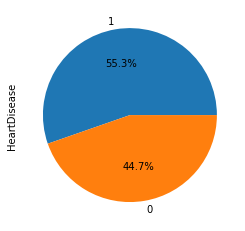

In [98]:
dataset['HeartDisease'].value_counts().plot.pie(autopct="%1.1f%%")

 ## DATA EXPLORATION

Per prima cosa visualizziamo in un istogramma i pazienti affetti o no da cardiopatia per vederne la distribuzione.

<AxesSubplot:ylabel='Frequency'>

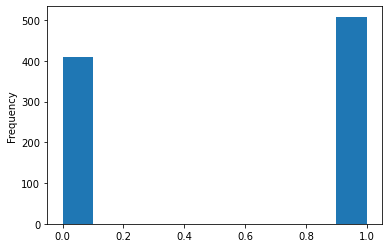

In [99]:
dataset["HeartDisease"].plot.hist()

Si visualizzano ora le distribuzioni delle variabili continue del dataset.

Text(0.5, 0, 'ST_Slope')

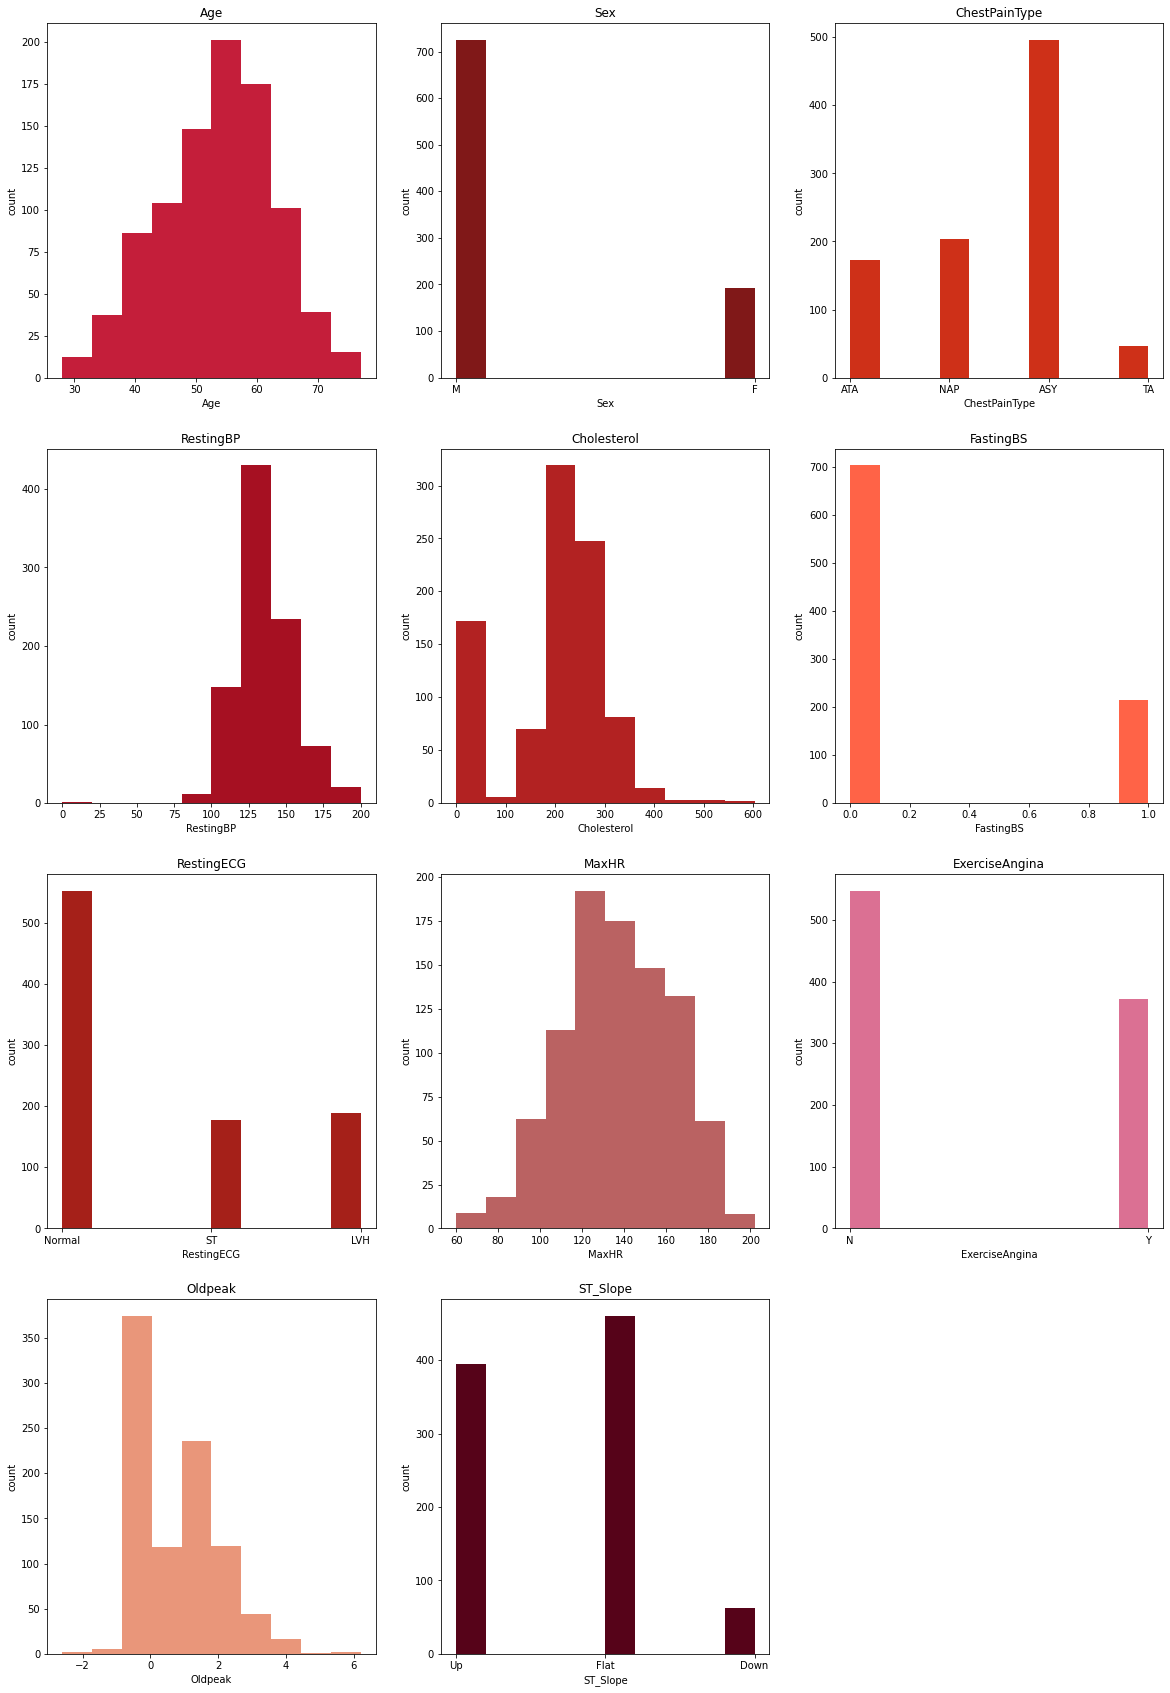

In [100]:
plt.figure(figsize=(20,30))

plt.subplot(4,3,1)
plt.title("Age")
plt.hist(dataset["Age"], color="#C41E3A")
plt.ylabel("count")
plt.xlabel("Age")

plt.subplot(4,3,2)
plt.title("Sex")
plt.hist(dataset["Sex"], color="#801818")
plt.ylabel("count")
plt.xlabel("Sex")

plt.subplot(4,3,3)
plt.title("ChestPainType")
plt.hist(dataset["ChestPainType"], color="#CE3018")
plt.ylabel("count")
plt.xlabel("ChestPainType")

plt.subplot(4,3,4)
plt.title("RestingBP")
plt.hist(dataset["RestingBP"], color="#A61022")
plt.ylabel("count")
plt.xlabel("RestingBP")

plt.subplot(4,3,5)
plt.title("Cholesterol")
plt.hist(dataset["Cholesterol"], color="#B22222")
plt.ylabel("count")
plt.xlabel("Cholesterol")

plt.subplot(4,3,6)
plt.title("FastingBS")
plt.hist(dataset["FastingBS"], color="#FF6347")
plt.ylabel("count")
plt.xlabel("FastingBS")

plt.subplot(4,3,7)
plt.title("RestingECG")
plt.hist(dataset["RestingECG"], color="#A52019")
plt.ylabel("count")
plt.xlabel("RestingECG")

plt.subplot(4,3,8)
plt.title("MaxHR")
plt.hist(dataset["MaxHR"], color="#BA6262")
plt.ylabel("count")
plt.xlabel("MaxHR")

plt.subplot(4,3,9)
plt.title("ExerciseAngina")
plt.hist(dataset["ExerciseAngina"], color="#DB7093")
plt.ylabel("count")
plt.xlabel("ExerciseAngina")

plt.subplot(4,3,10)
plt.title("Oldpeak")
plt.hist(dataset["Oldpeak"], color="#E9967A")
plt.ylabel("count")
plt.xlabel("Oldpeak")

plt.subplot(4,3,11)
plt.title("ST_Slope")
plt.hist(dataset["ST_Slope"], color="#560319")
plt.ylabel("count")
plt.xlabel("ST_Slope")


Dall' analisi dei vari istogrammi emerge che la maggior parte dei pazienti analizzati ha un età compresa tra i 40 e i 50 anni ed è di sesso maschile con colesterolo compreso tra 200 e 300 e senza angina da esercizio.


Text(0.5, 0, 'ST_Slope')

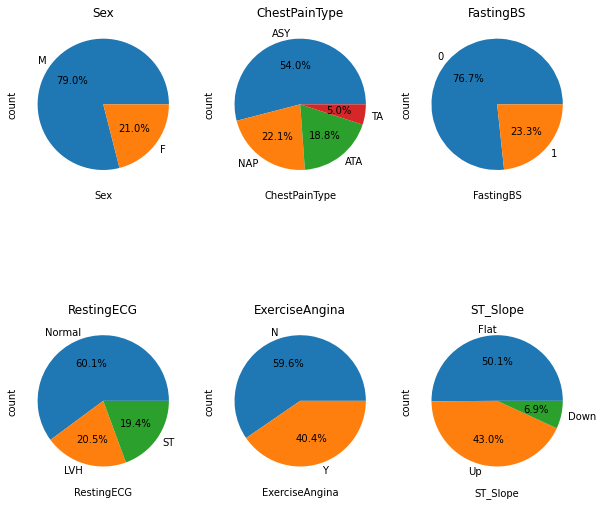

In [101]:
plt.figure(figsize=(10,10))

plt.subplot(2,3,1)
plt.title("Sex")
dataset['Sex'].value_counts().plot.pie(autopct="%1.1f%%")
plt.ylabel("count")
plt.xlabel("Sex")

plt.subplot(2,3,2)
plt.title("ChestPainType")
dataset['ChestPainType'].value_counts().plot.pie(autopct="%1.1f%%")
plt.ylabel("count")
plt.xlabel("ChestPainType")

plt.subplot(2,3,3)
plt.title("FastingBS")
dataset['FastingBS'].value_counts().plot.pie(autopct="%1.1f%%")
plt.ylabel("count")
plt.xlabel("FastingBS")

plt.subplot(2,3,4)
plt.title("RestingECG")
dataset['RestingECG'].value_counts().plot.pie(autopct="%1.1f%%")
plt.ylabel("count")
plt.xlabel("RestingECG")

plt.subplot(2,3,5)
plt.title("ExerciseAngina")
dataset['ExerciseAngina'].value_counts().plot.pie(autopct="%1.1f%%")
plt.ylabel("count")
plt.xlabel("ExerciseAngina")

plt.subplot(2,3,6)
plt.title("ST_Slope")
dataset['ST_Slope'].value_counts().plot.pie(autopct="%1.1f%%")
plt.ylabel("count")
plt.xlabel("ST_Slope")


Viene facile pensare che il parametro che influenzi maggiormente l'insorgere di cardiopatie sia l'età, anche se questa osservazione è errata.

Vediamo come, difatti, la media dell'età sia molto vicina.

In [102]:
dataset[dataset["HeartDisease"]==1]["Age"].mean()

55.8996062992126

Ora vediamo l'età media dei pazienti che invece non sono affetti da una qualsiasi cardiopatia.

In [103]:
dataset[dataset["HeartDisease"]==0]["Age"].mean()

50.551219512195125

Come emerso dalla precedente analisi si può osservare che l'insorgenza di una cardiopatia è strettamente legata ai seguenti parametri:
- Exercise angina;
- Oldpeak;
- Sex.

Partiamo ad analizzare *Exercise angina*.
Per prima cosa bisogna convertire questa variabile categorica in una variabile numerica, dove se il paziente non è stato affetto da angina da esercizio la variabile assume valore 0 ed 1 in caso contrario.

In [104]:
dataset['ExerciseAngina'].replace(['N', 'Y'], [0,1], inplace=True)
dataset.tail()

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
913    132               0      1.2     Flat             1  
914    141               0      3.4     Flat             1  
915    115               1      1.2     Flat             1  
916    174               0      0.0     Flat             1  
917    173               0      0.0       Up             0

<AxesSubplot:ylabel='Frequency'>

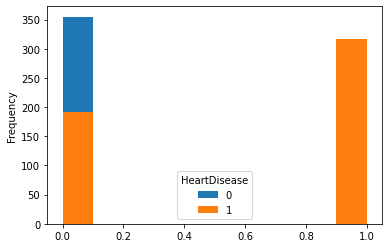

In [105]:
dataset.pivot(columns="HeartDisease")["ExerciseAngina"].plot.hist()

Dal grafico si evince che i pazienti con una cardiopatia(quelli in arancione), soffrono in misura nettamente superiore di angina da esercizio(chiamata anche Angina da sforzo).

In [106]:
dataset[dataset["HeartDisease"]==1]["ExerciseAngina"].mean()

0.6220472440944882

In [107]:
dataset[dataset["HeartDisease"]==0]["ExerciseAngina"].mean()

0.13414634146341464

Le analisi appena fatte confermano quanto sospettato: si vede che la media dei pazienti che sono affetti da cardiopatie è più del triplo dei pazienti che non ne soffrono.

Passiamo ad osservare *Oldpeak*: quello che ci si aspetta che questo valore sia più alto nei pazienti affetti da cardiopatie.

<AxesSubplot:ylabel='Frequency'>

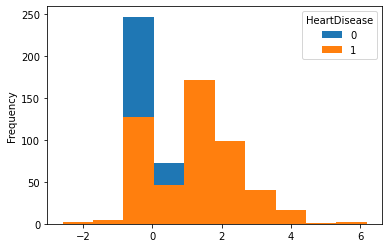

In [108]:
dataset.pivot(columns="HeartDisease")["Oldpeak"].plot.hist()

In [109]:
dataset[dataset["HeartDisease"]==1]["Oldpeak"].mean()

1.274212598425197

In [110]:
dataset[dataset["HeartDisease"]==0]["Oldpeak"].mean()

0.40804878048780474

La previsione era esatta: i pazienti affetti da cardiopatie(ovvero quelli in arancio), hanno valori di oldpeak più elevati rispetto a coloro che non ne sono affetti.

Infine analizziamo *Sex*,come fatto per Exercise Angina convertiamo la variabile categorica in una numerica dove lo 0 corrisponde all'uomo e l'1 alla donna:

In [111]:
dataset['Sex'].replace(['M', 'F'], [0,1], inplace=True)
dataset.tail()

Age  Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
913   45    0            TA        110          264          0     Normal   
914   68    0           ASY        144          193          1     Normal   
915   57    0           ASY        130          131          0     Normal   
916   57    1           ATA        130          236          0        LVH   
917   38    0           NAP        138          175          0     Normal   

     MaxHR  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
913    132               0      1.2     Flat             1  
914    141               0      3.4     Flat             1  
915    115               1      1.2     Flat             1  
916    174               0      0.0     Flat             1  
917    173               0      0.0       Up             0

<AxesSubplot:ylabel='Frequency'>

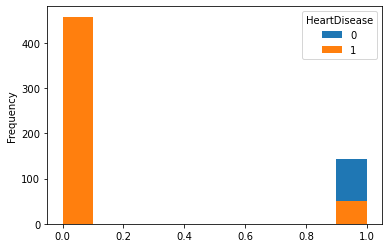

In [112]:
dataset.pivot(columns="HeartDisease")["Sex"].plot.hist()

In [113]:
dataset[dataset["HeartDisease"]==1]["Sex"].mean()

0.0984251968503937

In [114]:
dataset[dataset["HeartDisease"]==0]["Sex"].mean()

0.348780487804878

Possiamo notare che i pazienti affetti da cardiopatie sono per lo più donne, difatti la media dei pazienti affetti da cardiopatie ci fa notare che vi è un'equa distribuzione tra donne e uomini.

Nel dizionario che segue viene associato un colore alle due classi in esame.
I pazienti affetti da cardiopatie verranno rappresentati dal colore rosso, al contrario i restanri verranno rappresentati dal colore blu.

In [115]:
account_color_map ={0:"blue", 1:"red"}
account_colors= dataset["HeartDisease"].map(account_color_map)

<AxesSubplot:xlabel='Oldpeak', ylabel='ExerciseAngina'>

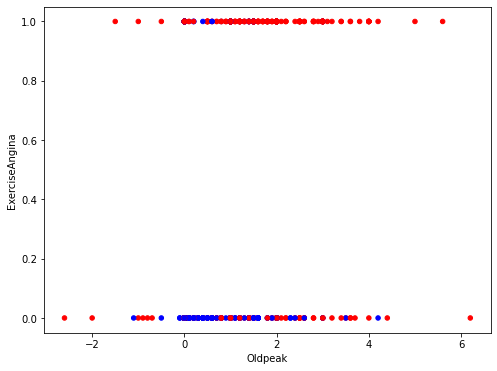

In [116]:
dataset.plot.scatter("Oldpeak", "ExerciseAngina", c=account_colors, figsize=(8,6))

## PREPROCESSING DEI DATI

In questa fase, partendo dai risultati dell'analisi precedente, effettuiamo una trasformazione dei dati in modo tale che siano pronti per essere elabrati dagli algoritmi di learning.

Nel dataset sono presenti delle variabili categoriche, essendo più facile lavorare con variabili numeriche, effettuiamo una trasformazione dei dati.
Le variabili di tipo categoriche da processare sono:
- *Sex*;
- *ChestPainType*;
- *RestingECG*;
- *ExerciseAngina*;
- *ST_Slope*.

In precedenza le variabili *Sex* e *ExerciseAngina* sono già state trasformate quindi è necessario solo concentrarsi sulle restanti.

In [117]:
dataset['ChestPainType'].replace(['ATA', 'NAP', 'ASY', 'TA'], [0,1,2,3], inplace=True)
dataset['RestingECG'].replace(['Normal', 'LVH', 'ST'], [0,1,2], inplace=True)
dataset['ST_Slope'].replace(['Flat', 'Up','Down'], [0,1,2], inplace=True)
dataset.tail()

Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
913   45    0              3        110          264          0           0   
914   68    0              2        144          193          1           0   
915   57    0              2        130          131          0           0   
916   57    1              0        130          236          0           1   
917   38    0              1        138          175          0           0   

     MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  
913    132               0      1.2         0             1  
914    141               0      3.4         0             1  
915    115               1      1.2         0             1  
916    174               0      0.0         0             1  
917    173               0      0.0         1             0

## STUDIO DATASET

Il set y rappresenta l'output, ovvero la sola feature *HeartDisease*, nel set x ci sono invece tutte le altre feature.

In [118]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Perceptron
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sb
from sklearn.metrics import precision_score, recall_score, f1_score


In [119]:
y=dataset["HeartDisease"]
x = dataset.drop(["HeartDisease"], axis=1)

In [120]:
X_pre_train, X_pre_val, y_pre_train, y_pre_val = train_test_split(
    x,
    y,
    test_size=1/3, random_state=42
)

Definiamo ora i metodi per fare il training del modello e calcolare lo score.

In [121]:
def get_coefficients(model, index, model_name="model"):
    return pd.Series(model.named_steps[model_name].coef_[0], index=index)
    
def fit(model, X_train, y_train, X_val, y_val):
    model.fit(X_train, y_train)
    f1_measure = f1_score( y_val,  model.predict(X_val), average="macro")
    print("F1_measure: ", f1_measure)

Vengono utilizzati i dati divisi precedentemente, usando l'algoritmo Perceptron, per allineare un modello di classificazione.
Il parametro class_weight permette di aumentare il peso degli errori nella classe con meno istanze.
Come iperparametro alpha si è scelto quello che restituisce l'f1_measure maggiore.

In [122]:
model_coeffs = []
i = 0

for alpha in np.logspace(-4, 0, 5):
    print("alpha {} :\n".format(alpha))
    model = Pipeline([("scaler", StandardScaler()), ("model",  Perceptron(random_state=42, penalty="l1", class_weight={1:5},alpha=alpha))
    ])
    fit(model, X_pre_train, y_pre_train, X_pre_val, y_pre_val)
    model_coeffs.append(get_coefficients(model, X_pre_train.columns))
    i += 1
    print("\n")

alpha 0.0001 :

F1_measure:  0.7670518457920033


alpha 0.001 :

F1_measure:  0.7013614404918753


alpha 0.01 :

F1_measure:  0.6665854815346554


alpha 0.1 :

F1_measure:  0.3729508196721311


alpha 1.0 :

F1_measure:  0.3729508196721311




In [123]:
std_pen_model = Pipeline([("scaler", StandardScaler()), ("model",  Perceptron(random_state=42,penalty="l1", class_weight={1:5},alpha=0.0001))
    ])
fit(std_pen_model, X_pre_train, y_pre_train, X_pre_val, y_pre_val)

F1_measure:  0.7670518457920033


Effettuo l'analisi su tutte le variabili presenti all'interno del dataframe.

In [124]:
std_pen_model_coeff = get_coefficients(std_pen_model, X_pre_train.columns, 'model')
std_pen_model_coeff[std_pen_model_coeff!=0]

Age               -0.540566
Sex                0.300788
ChestPainType      5.287655
RestingBP          9.687716
Cholesterol       -5.292145
FastingBS         -0.134405
RestingECG         0.459714
MaxHR             -5.454090
ExerciseAngina    13.119868
Oldpeak           11.669683
ST_Slope          -9.077588
dtype: float64

L'analisi, a seguito di standardizzazione l1 con alpha=0.0001(che produce il miglior f1_score con perceptron), rivela che la feature più irrilevante è *FastingBS*. La più importante è invece *ExerciseAngina* seguita da *Oldpeak* e *RestingBP*.

Ora viene mostrata una heat map che utilizza la *Correlazione di Pearson* per verificare se esiste o meno una relazione significativa e positiva tra due variabili.
Il metodo della Correlazione di Pearson assegna un valore tra -1 ed 1, dove 0 indica assenza di correlazione, 1 correlazione positiva e -1 correlazione negativa totale.

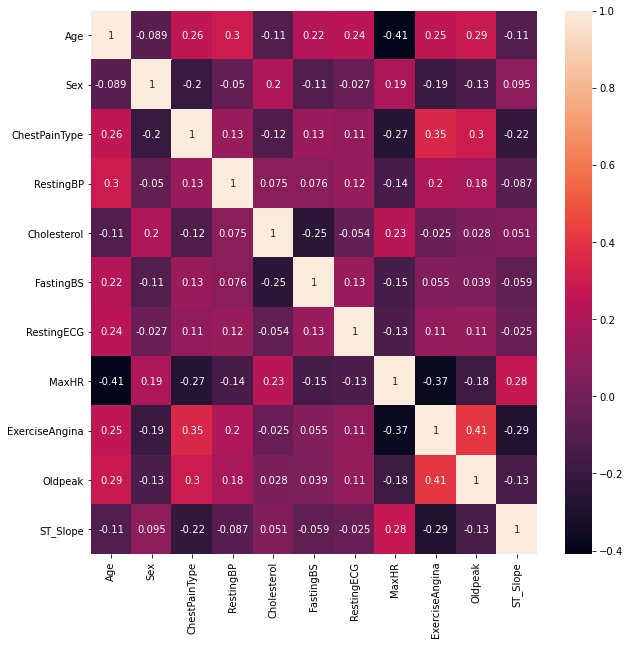

In [125]:
pearson_correlation = X_pre_train.corr(method='pearson')

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

sb.heatmap(pearson_correlation, annot=True)

plt.show()

Non si evidenziano correlazioni significative.


Il seguente grafico mostra la distribuzione dei pazienti affetti da cardiopatie e non al variare delle feature più importanti, ovvero : *ExerciseAngina*, *Oldpeak* e *RestingBP*.

In [126]:
account_color_map ={0:"blue", 1:"red"}
account_colors= dataset["HeartDisease"].map(account_color_map)

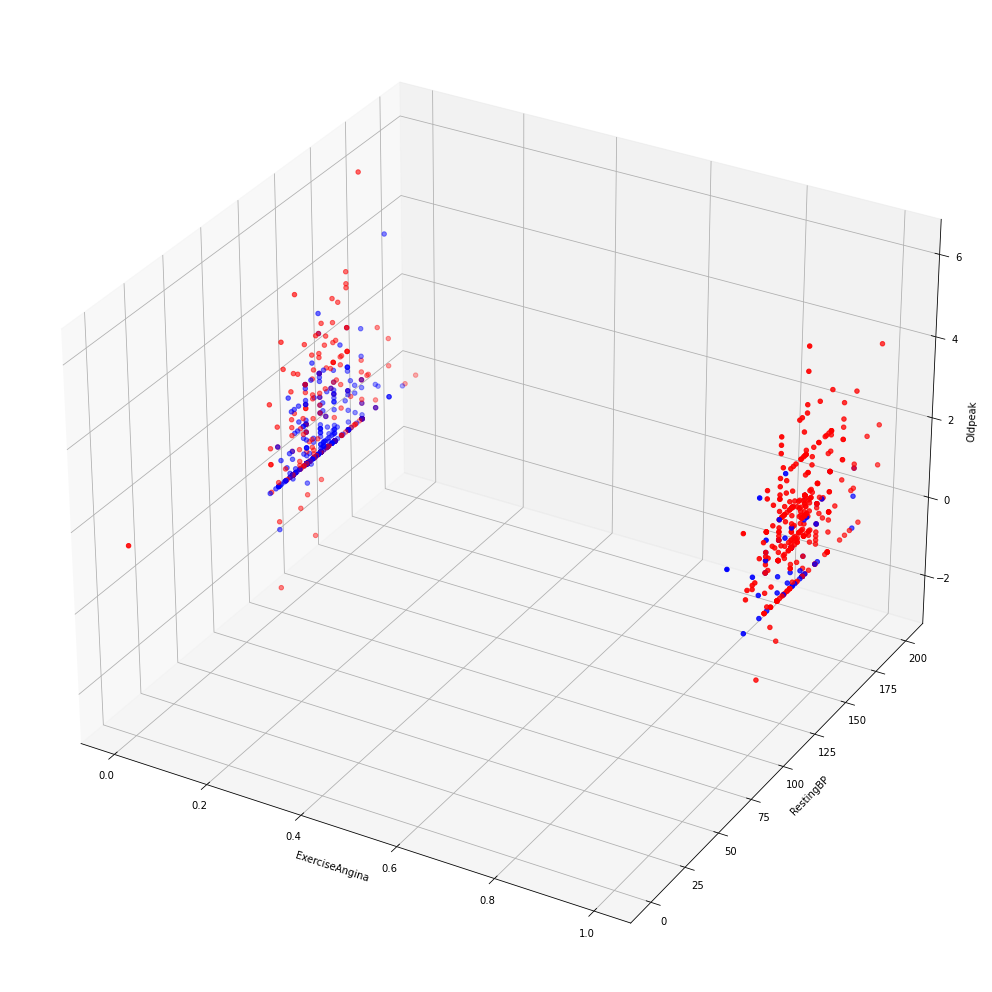

In [127]:
fig = plt.figure(figsize=(18, 18))
ax = fig.add_subplot(projection='3d')
x = "ExerciseAngina"
z = "Oldpeak"
y = "RestingBP"
ax.set_xlabel(x)
ax.set_ylabel(y)
ax.set_zlabel(z)
tmp = dataset
account_colors= tmp["HeartDisease"].map(account_color_map)

ax.scatter(tmp[x], tmp[y], tmp[z], c=account_colors)

Si può osservare come i pazienti affetti da cardiopatie abbiano un Oldpeak più elevato e soffrano di Angina da Esercizio in quantità nettamente più elevata.

## PARTE 3

In questa fase si confrontano i diversi modelli di classificazione per poi effettuare un confronto e capire quale è il migliore, ovvero il più efficiente.

In [129]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import math
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix


La seguente funziona confronta il modello con i diversi iperparametri e ritorna il modello che ha restituito la f1_measure migliore. 

In [130]:
from sklearn.utils import class_weight
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)
models = {}

def print_k_cross_validation_scores(model, X, y, kf):
    scores = cross_val_score(model, X, y, cv=kf)
    print("            Scores: {}\n              Mean: {}\nStandard deviation: {}".format(scores, scores.mean(), scores.std()))

def grid_search_with_cross_validation(model, grid, kf, dataset, class_attribute, scoring=None):
    grid_search = GridSearchCV(model, grid, scoring=scoring, cv=kf, n_jobs=-1)

    X_train, X_val, y_train, y_val = train_test_split(
        dataset.drop([class_attribute], axis=1),
        dataset[class_attribute],
        test_size=1/3, random_state=42
    )

    grid_search.fit(X_train, y_train)
    
    score = grid_search.score(X_val, y_val)

    print("Best cross validation score: {}\n".format(grid_search.best_score_))
    print("             Test set score: {}\n".format(score))
    print("                Best params: {}\n".format(grid_search.best_params_))
    print("             Best estimator: {}\n".format(grid_search.best_estimator_))
    return grid_search.best_estimator_, score
    #print(pd.DataFrame(grid_search.cv_results_))


Le seguenti funzioni verrranno usate per graficare i modelli, per ogni combinazione di features.

In [131]:
def separator_2d(model, x1, nameModel, m, n):
    # ricaviamo w e b dal modello
    w = model.named_steps[nameModel].coef_[0]
    b = model.named_steps[nameModel].intercept_
    return -x1 * w[m] / w[n] - b / w[n]

In [132]:
def separator_3d(model, x1,y1, nameModel, i,j,t):
    # ricaviamo w e b dal modello
    w = model.named_steps[nameModel].coef_[0]
    b = model.named_steps[nameModel].intercept_
    return ((-x1 * w[i]) / w[t]) -((y1* w[j])/w[t]) - (b / w[t])

In [133]:
def draw_line(model, nameModel, i, j, color):
    xlim, ylim = plt.xlim(), plt.ylim()
    sep_x = np.linspace(*xlim, 2)
    sep_y = separator_2d(model, sep_x, nameModel, i , j)
    plt.plot(sep_x, sep_y, c=color, linewidth=2, label=nameModel)
    plt.xlim(xlim); plt.ylim(ylim)


def plot_separator_on_data(X, y, dataset,avoidList, model=None, nameModel=None,
                           repeatCombination = True, newFig = True,
                           lineColor = "green"):
    X = np.array(X)
    n, m = X.shape
    colors = pd.Series(y).map(account_color_map)
    if(newFig):
      plt.figure(figsize=(50, 50))
    k = 0
    for i in range(m): 
      g = 0 if repeatCombination else i+1
      for j in range(g,m):
        if(j!=i and i not in(avoidList) and j not in (avoidList)):
          k+=1
          plt.subplot(m, m, k)
          plt.scatter(X[:, i], X[:, j], c=colors)
          plt.xlabel(dataset.columns[i])
          plt.ylabel(dataset.columns[j])
          if model is not None:
            draw_line(model,nameModel, i, j, lineColor)
             

Di seguito viene definita una funzione che calcola tutti i dati utili per valutare un modello.
- Accuratezza: percentuale di classificazioni corrette (in caso di sbilanciamento tra classi, non molto utile), utile per valutare la qualità del modello.
- Precision: è il rapporto tra il numero delle previsioni corrette di un evento (classe) sul totale delle volte che il modello lo prevede.
- Recall: misura la sensibilità del modello. Rappresenta il rapporto tra le previsioni corrette per una classe sul totale dei casi in cui si verifica effettivamente.
- F1-measure: media armonica tra precision e recall: misura unica della performance di un modello
.

In [134]:
def measureModel(x_val, y_val, y_pred, model):
  accuracy = model.score(x_val, y_val)
  precision_fake_heart_disease = precision_score(y_val, y_pred, pos_label=1)
  precision_real_heart_disease = precision_score(y_val, y_pred, pos_label=0)
  recall_fake_heart_disease = recall_score(y_val, y_pred, pos_label=1)
  recall_real_heart_disease = recall_score(y_val, y_pred, pos_label=0)
  f1_measure = f1_score(y_val, y_pred, average="macro")
  print("Accuracy: {}\n".format(accuracy))
  print("Precision fake heart disease: {}\n".format(precision_fake_heart_disease))
  print("Precision real heartDisease: {}\n".format(precision_real_heart_disease))
  print("Recall fake heartDisease: {}\n".format(recall_fake_heart_disease))
  print("Recall real HeartDisease: {}\n".format(recall_real_heart_disease))
  print("f1_measure: {}\n".format(f1_measure))

## PERCEPTRON

Per iniziare verrà utilizzato il metodo seguente per acquisire la miglior combinazione di iperparametri per il metodo Perceptron.
Viene utilizzato il parametro class_weight per aumentare il peso degli errori nella classe con meno istanze.

In [135]:
%%time

per_model = Pipeline([
    ("scaler", StandardScaler()),
    ("per", Perceptron(n_jobs=-1, random_state=42, class_weight={1:5}))
])

#print(per_model.get_params())

per_grid = {
    "scaler": [None, StandardScaler()],
    "per__penalty": ["l2", "l1", "elasticnet"],
    "per__alpha": np.logspace(-3, 3, 7),
    "per__fit_intercept": [False, True]
}

per_model, score = grid_search_with_cross_validation(per_model, per_grid, k_fold, dataset, "HeartDisease", scoring = "f1_macro")
models["Perceptron1"] = {"Model": per_model, "Score": score}


Best cross validation score: 0.7960580496907588

             Test set score: 0.7746588693957115

                Best params: {'per__alpha': 0.001, 'per__fit_intercept': False, 'per__penalty': 'l2', 'scaler': StandardScaler()}

             Best estimator: Pipeline(steps=[('scaler', StandardScaler()),
                ('per',
                 Perceptron(alpha=0.001, class_weight={1: 5},
                            fit_intercept=False, n_jobs=-1, penalty='l2',
                            random_state=42))])

Wall time: 5.42 s


Ora definiamo il modello per Perceptron utilizzando i valori di iperparametri appena ottenuti.

In [136]:
model = Pipeline(steps=[('scaler', StandardScaler()),
                ('per',
                 Perceptron(alpha=0.001, class_weight={1: 5}, fit_intercept=False,
                            n_jobs=-1, penalty='l2', random_state=42))])
model.fit(X_pre_train, y_pre_train)

f1_measure = f1_score( y_pre_val,  model.predict(X_pre_val), average="macro")
models["Perceptron1"] = {"Model": model, "Score": f1_measure}


In [137]:
y_pred = model.predict(X_pre_val)
measureModel(X_pre_val, y_pre_val, y_pred, model)

Accuracy: 0.7777777777777778

Precision fake heart disease: 0.85625

Precision real heartDisease: 0.6917808219178082

Recall fake heartDisease: 0.7527472527472527

Recall real HeartDisease: 0.8145161290322581

f1_measure: 0.7746588693957115



Possiamo osservare che il valore più basso tra quelli ottenuti è la precisione relativa ai pazienti affetti realmente da cardiopatie, ovvero la percentuale di pazienti predetti come affetti da cardiopatie che lo erano veramente.
Al contrario il valore maggiormente elevato è la precisione relativa ai pazienti non affetti da cardiopatie, ovvero la percentuale di pazienti predetti come non affetti da cardiopatie che non ne erano realmente affetti.
É necessario sottolineare che la recall per i pazienti predetti correttamente sui totali risulta essere alta per entrambe le classi.

Il passo successivo consiste nel visualizzare i coefficienti a seguit dell'applicazione del modello.

In [138]:
print(model.named_steps["per"].coef_)
print(model.named_steps["per"].intercept_)

[[  4.58481766 -12.4595219   17.66471161  -3.81091267   0.39131926
   -4.49602359  -2.16152918   7.93278042   6.52369692   4.01501578
  -14.11715395]]
[0.]


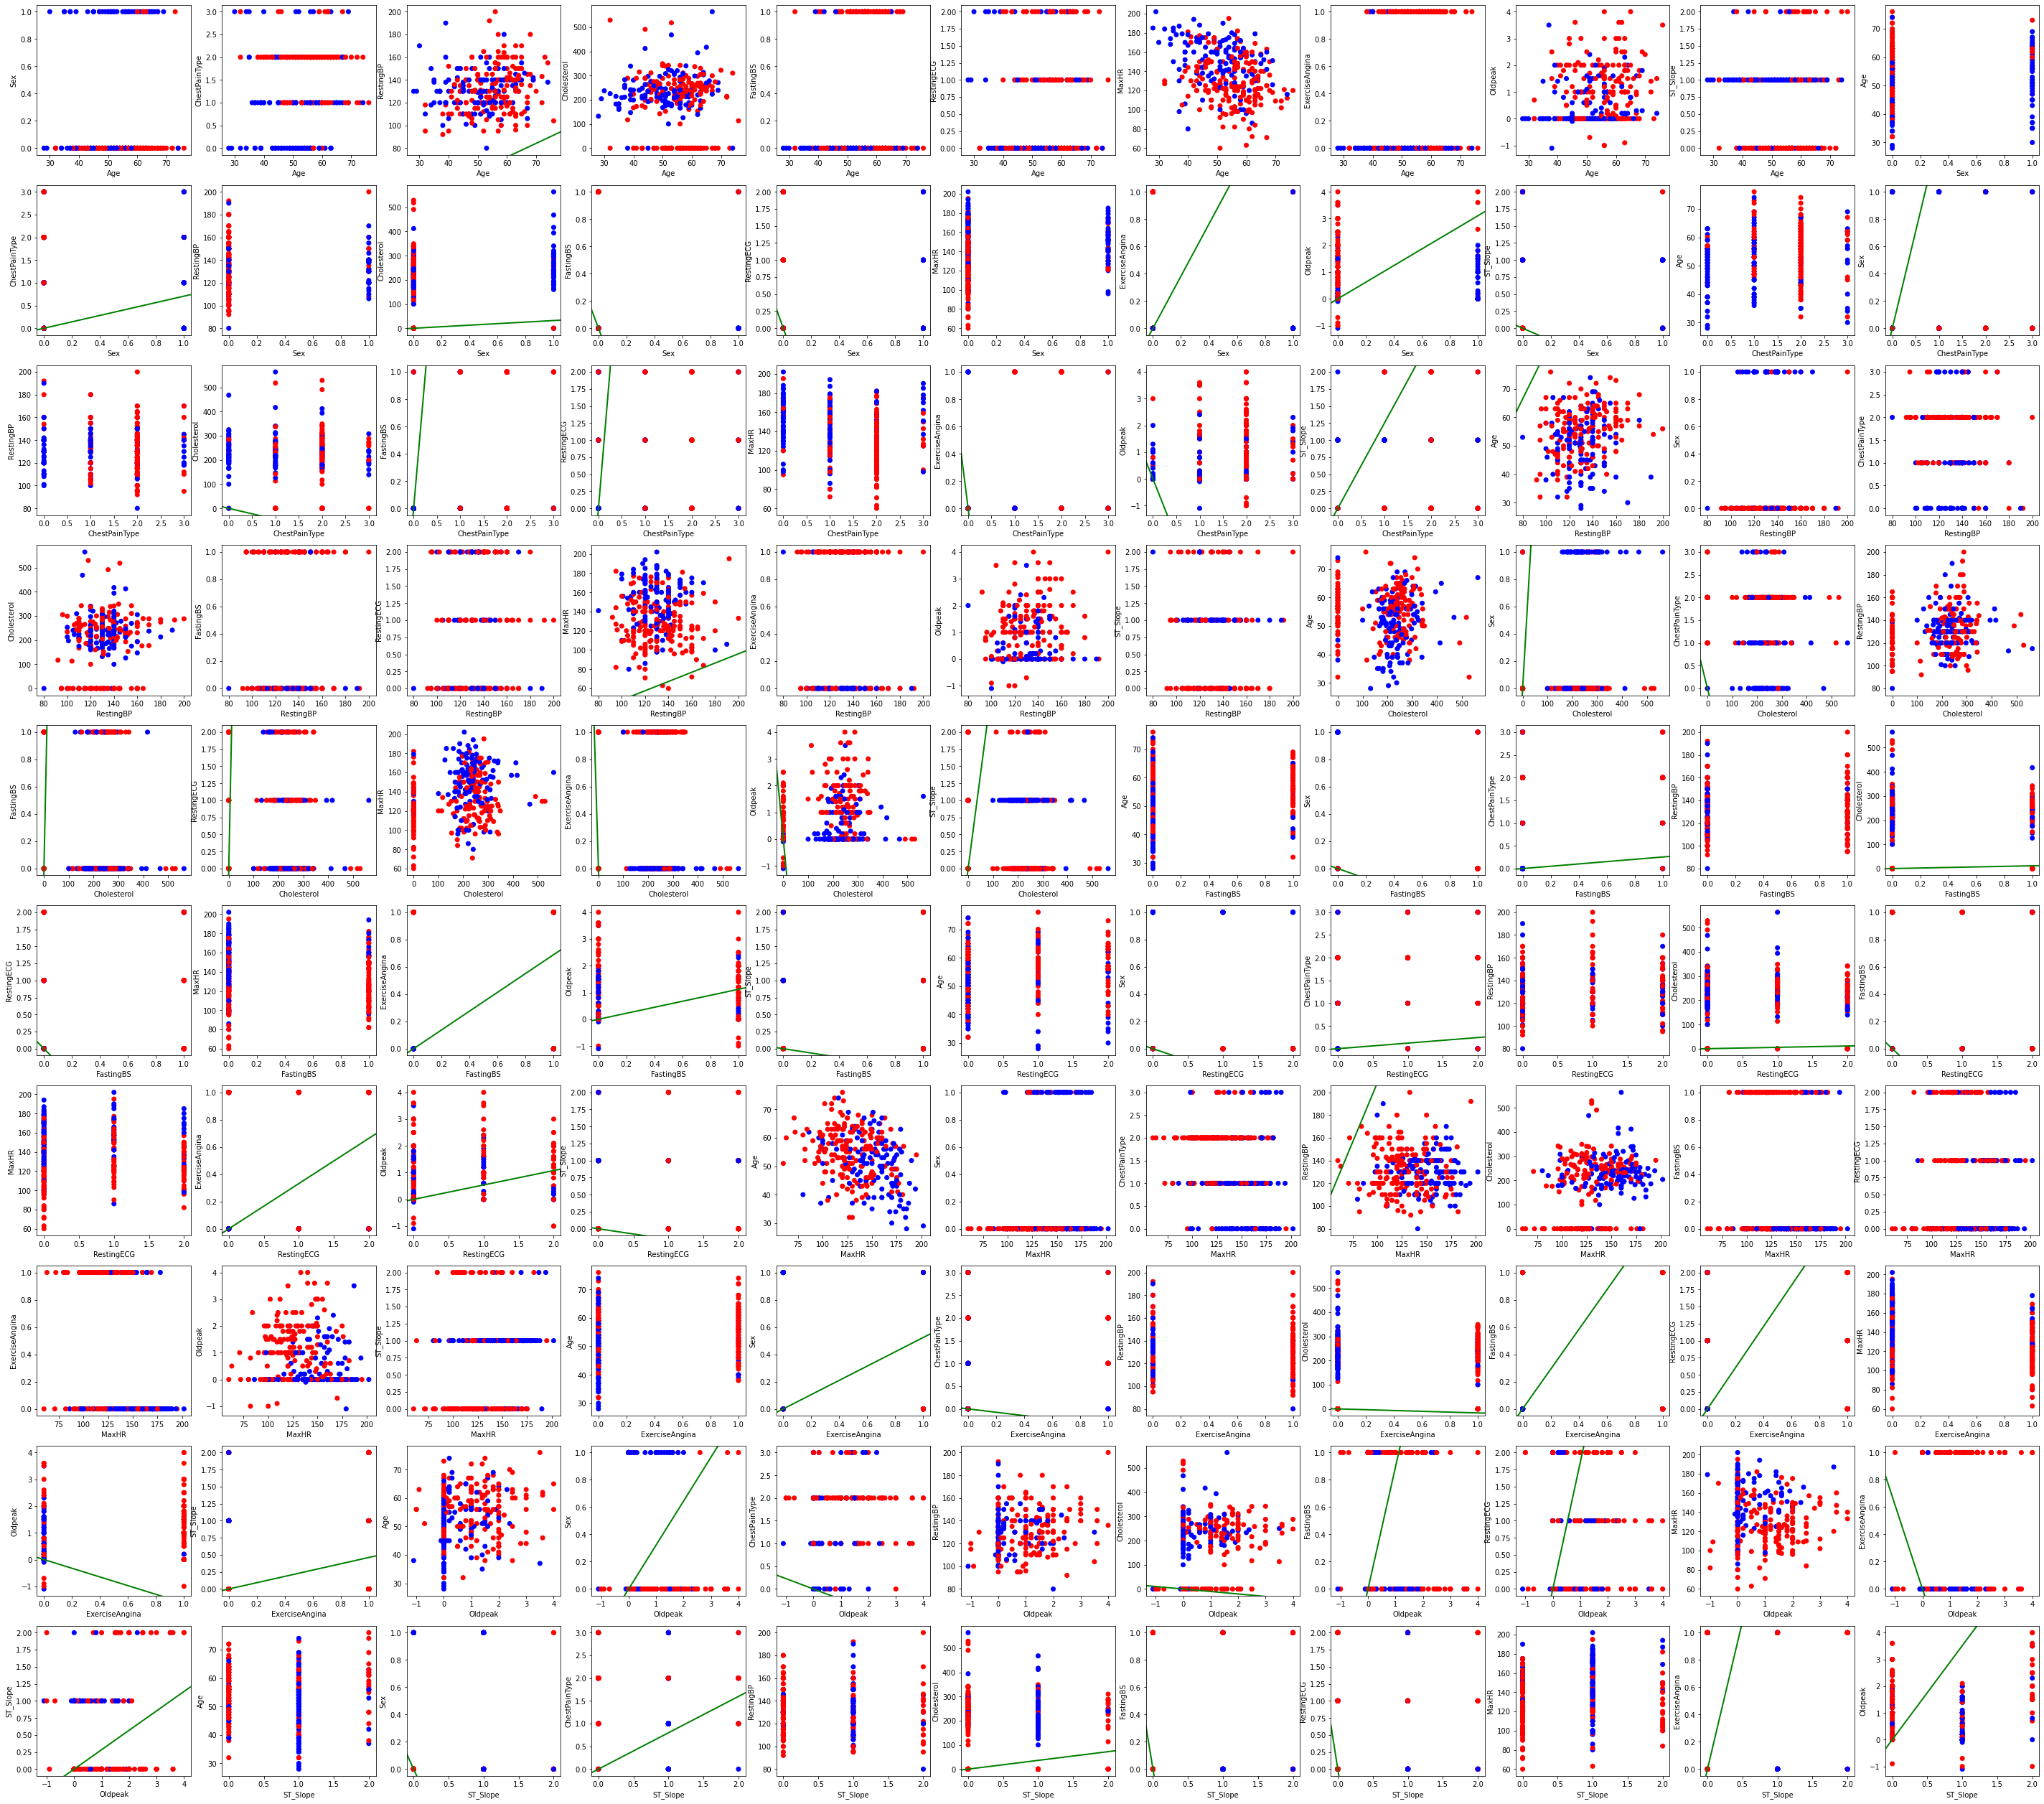

In [139]:
plot_separator_on_data(X_pre_val, y_pre_val, dataset,[],model, "per")

## REGRESSIONE LOGISTICA

Si passa allo studio della regressione logistica.
I passaggi effettuati sono gli stessi visti per il Perceptron.

In [140]:
%%time

log_model = Pipeline([
    ("scaler", StandardScaler()),
    ("lr", LogisticRegression(solver='liblinear', class_weight={1:5}, random_state=42))
])

#print(log_model.get_params())

log_grid = {
    "scaler": [None, StandardScaler()],
    "lr__penalty": ["l2", "l1"],
    "lr__C": np.logspace(-4, 2, 7),
    "lr__fit_intercept": [False, True]
}

log_model, score = grid_search_with_cross_validation(log_model, log_grid, k_fold, dataset,"HeartDisease", scoring = "f1_macro")
models["Logistic Regression1"] = {"Model" : log_model, "Score": score}

Best cross validation score: 0.8353733568375354

             Test set score: 0.8404102742405146

                Best params: {'lr__C': 0.1, 'lr__fit_intercept': False, 'lr__penalty': 'l2', 'scaler': StandardScaler()}

             Best estimator: Pipeline(steps=[('scaler', StandardScaler()),
                ('lr',
                 LogisticRegression(C=0.1, class_weight={1: 5},
                                    fit_intercept=False, random_state=42,
                                    solver='liblinear'))])

Wall time: 1.17 s


In [141]:
log_model = Pipeline(steps=[('scaler', StandardScaler()),
                ('lr',
                 LogisticRegression(C=0.1, class_weight={1: 5},penalty="l2",
                                    fit_intercept=False,
                                    random_state=42, solver='liblinear'))])
log_model.fit(X_pre_train, y_pre_train)
f1_measure = f1_score( y_pre_val,  log_model.predict(X_pre_val), average="macro")
models["Logistic Regression1"] = {"Model" : log_model, "Score": f1_measure}


In [142]:
measureModel(X_pre_val, y_pre_val, log_model.predict(X_pre_val), log_model)

Accuracy: 0.8431372549019608

Precision fake heart disease: 0.9085365853658537

Precision real heartDisease: 0.7676056338028169

Recall fake heartDisease: 0.8186813186813187

Recall real HeartDisease: 0.8790322580645161

f1_measure: 0.8404102742405146



Dall'analisi si evince che il valore più basso risulta essee la precisione sui pazienti affetti realmente da cardiopatie(proprio come per il Perceptron).
Il valore della f1_measure risulta nettamente migliore rispetto a quello rilevato per il Perceptron.

In [143]:
log_model.named_steps["lr"].coef_

array([[ 0.37603974, -0.47214614,  0.96958779, -0.16443194, -0.32533738,
         0.36815707, -0.04195814, -0.19998995,  0.60158466,  0.6790072 ,
        -0.84098623]])

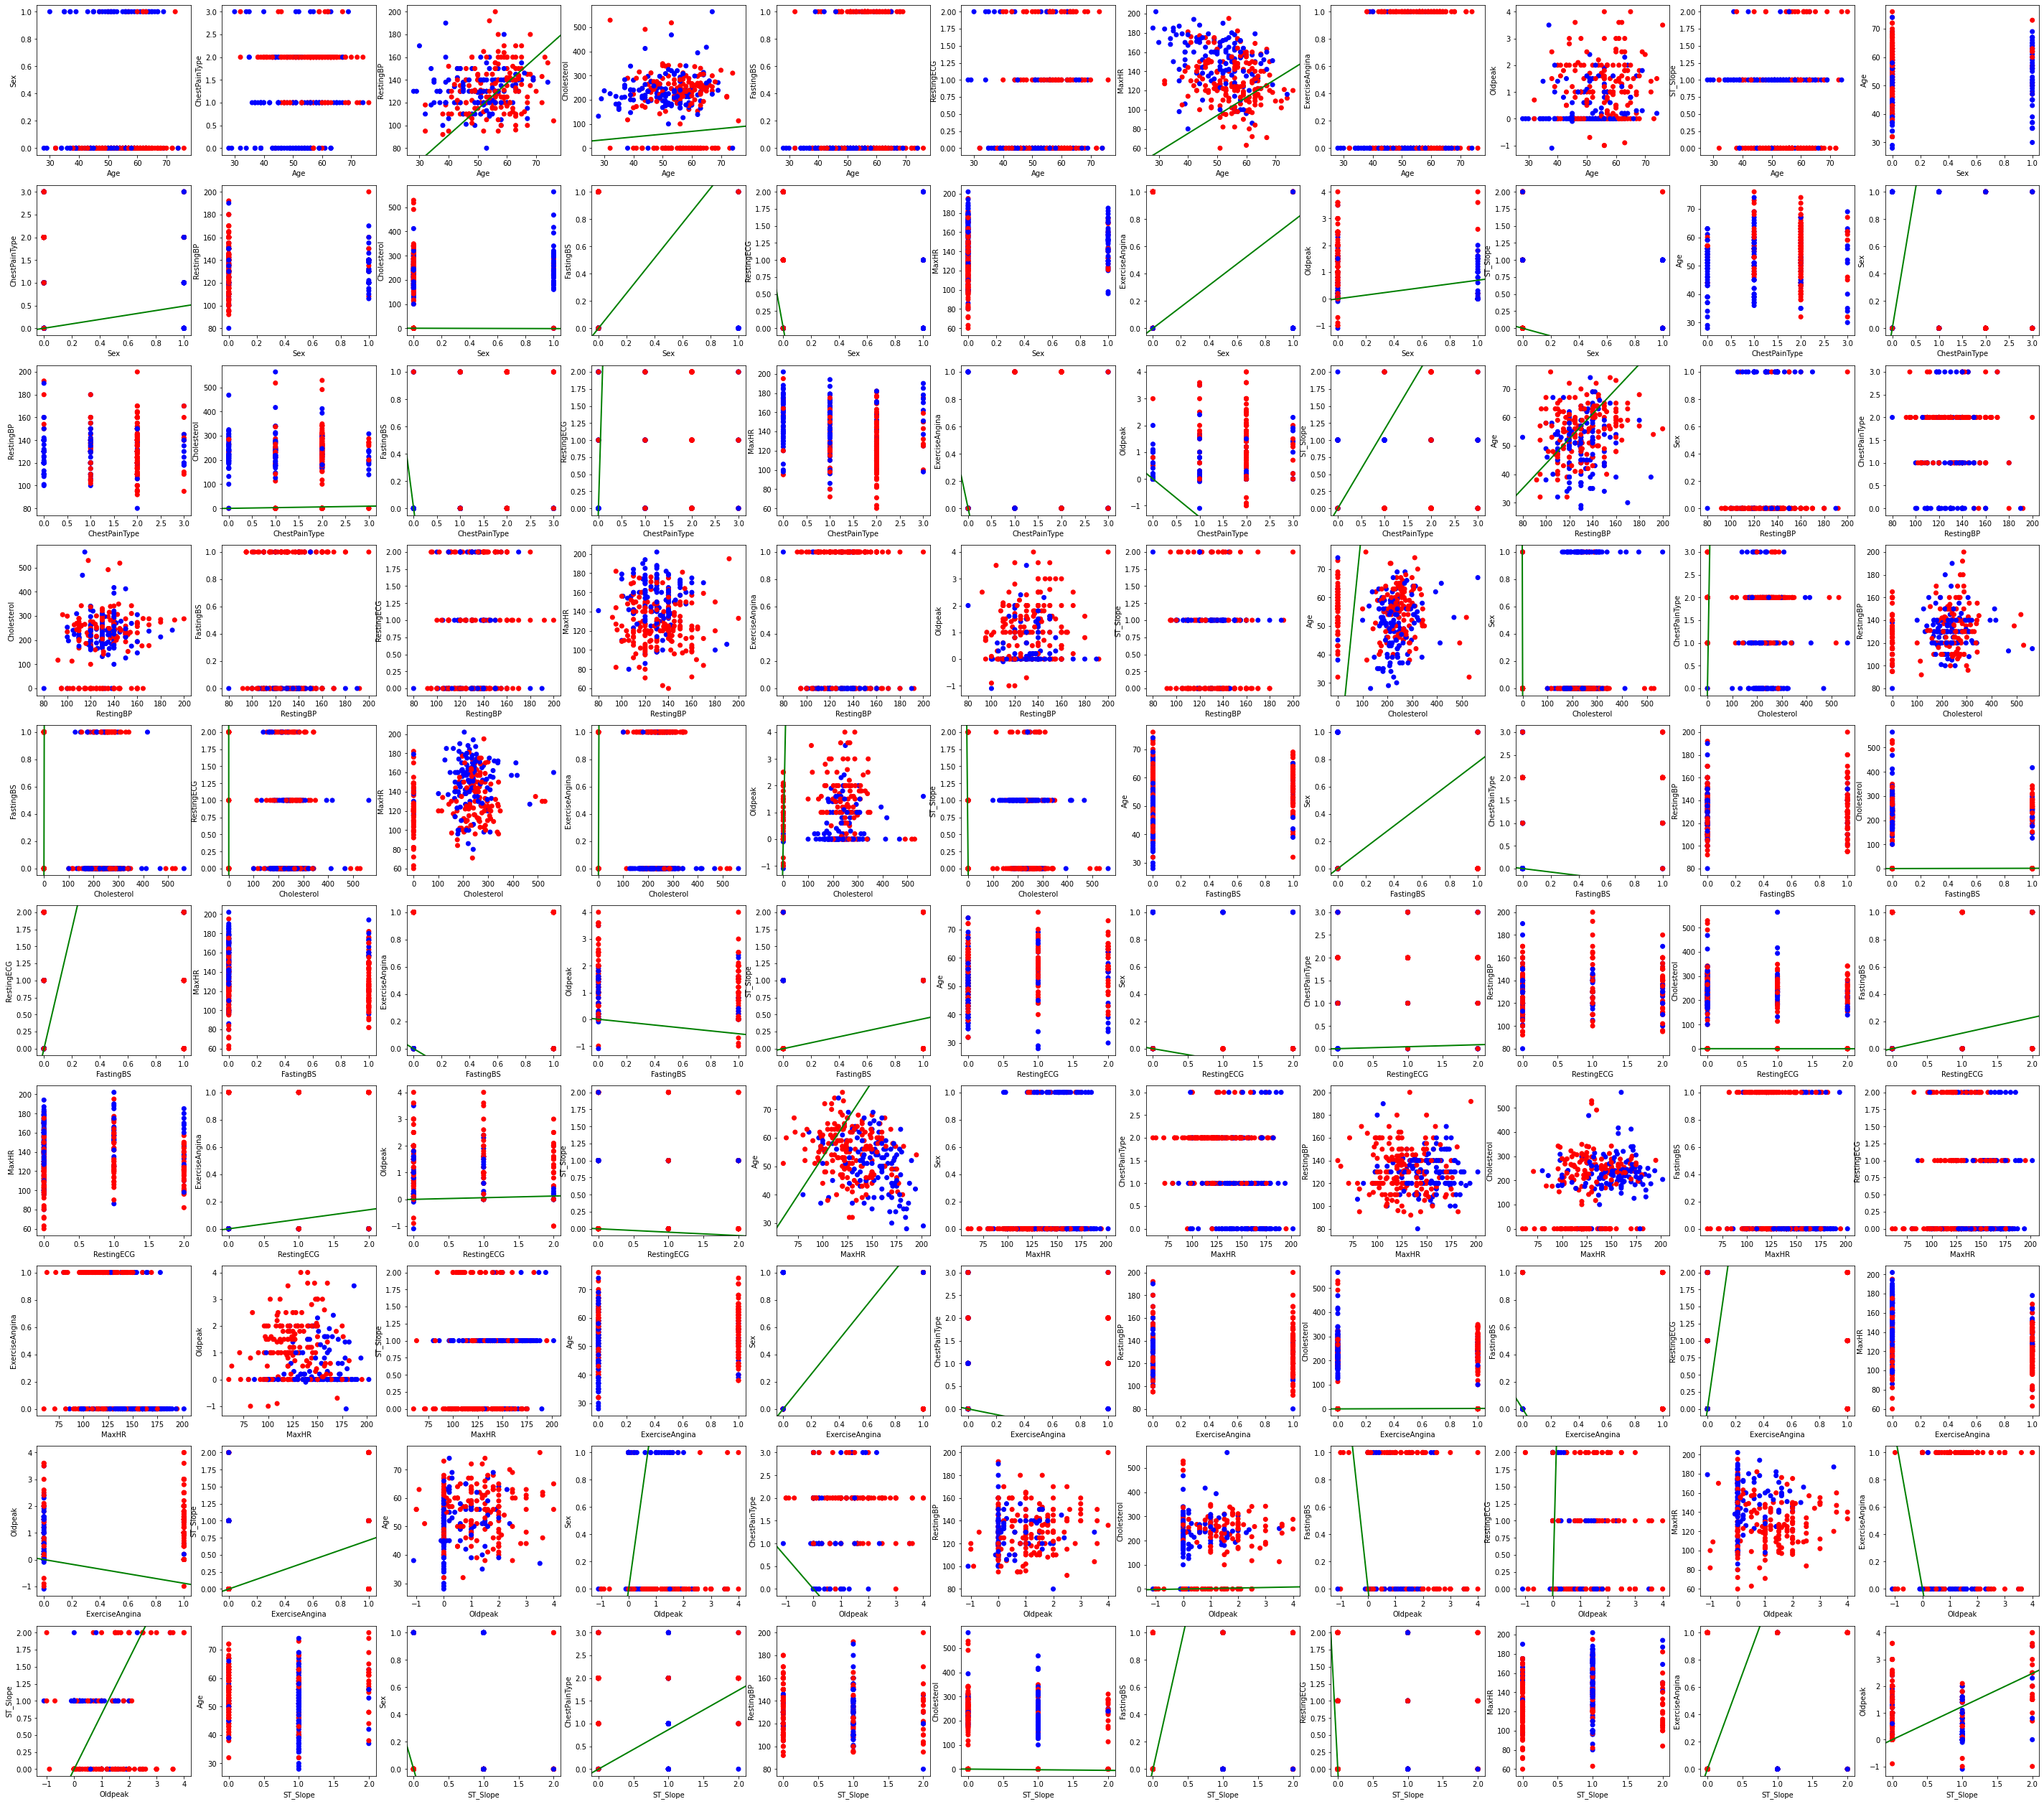

In [57]:
plot_separator_on_data(X_pre_val, y_pre_val,dataset,[],log_model, "lr")

## SUPPORT VECTOR MACHINE

Si passa alla valutazione del modello Support Vector Machine, anche chiamato SVM.

In [58]:
svm_model = Pipeline([
    ("scaler", StandardScaler()),
    ("svc", SVC())
])

#print(svm_model.get_params())

svm_grid = [
  {'svc__C': np.logspace(3, 5, 3), 'svc__kernel': ['linear']},
  {'svc__C': np.logspace(3, 5, 3), 'svc__gamma': ['scale'], 'svc__kernel': ['rbf']},
]

svm_model, score= grid_search_with_cross_validation(svm_model, svm_grid, k_fold,  dataset, "HeartDisease",  scoring = "f1_macro")
models["Support Vector Machine1"] = {"Model": svm_model, "Score": score}

Best cross validation score: 0.840144709330961

             Test set score: 0.8464994547437296

                Best params: {'svc__C': 1000.0, 'svc__kernel': 'linear'}

             Best estimator: Pipeline(steps=[('scaler', StandardScaler()),
                ('svc', SVC(C=1000.0, kernel='linear'))])



In [144]:
svm_model = Pipeline(steps=[('scaler', StandardScaler()),
                ('svc', SVC(C=1000.0, kernel='linear', random_state=42))])
svm_model.fit(X_pre_train, y_pre_train)
f1_measure = f1_score( y_pre_val,  svm_model.predict(X_pre_val), average="macro")
models["Support Vector Machine"] = {"Model": svm_model, "Score": f1_measure}

In [145]:
measureModel(X_pre_val, y_pre_val, svm_model.predict(X_pre_val), svm_model)

Accuracy: 0.8496732026143791

Precision fake heart disease: 0.9047619047619048

Precision real heartDisease: 0.782608695652174

Recall fake heartDisease: 0.8351648351648352

Recall real HeartDisease: 0.8709677419354839

f1_measure: 0.8464994547437296



Come per i modelli precedenti la precisione dei pazienti non affetti realmente da cardiopatie è molto alta, al contrario della precisione dei pazienti realmente affetti da cardiopatie.
Possiamo infine notare che il valore del *f1_measure* è migliore rispetto ad entrambi i precedenti modelli.

In [146]:
svm_model.named_steps["svc"].intercept_

array([0.23431103])

In [147]:
svm_model.named_steps["svc"].coef_

array([[ 0.02601238, -0.2459894 ,  0.30562193, -0.04821023, -0.34753578,
         0.24953461, -0.03024955, -0.2234197 ,  0.52597589,  0.54478224,
        -0.52813069]])

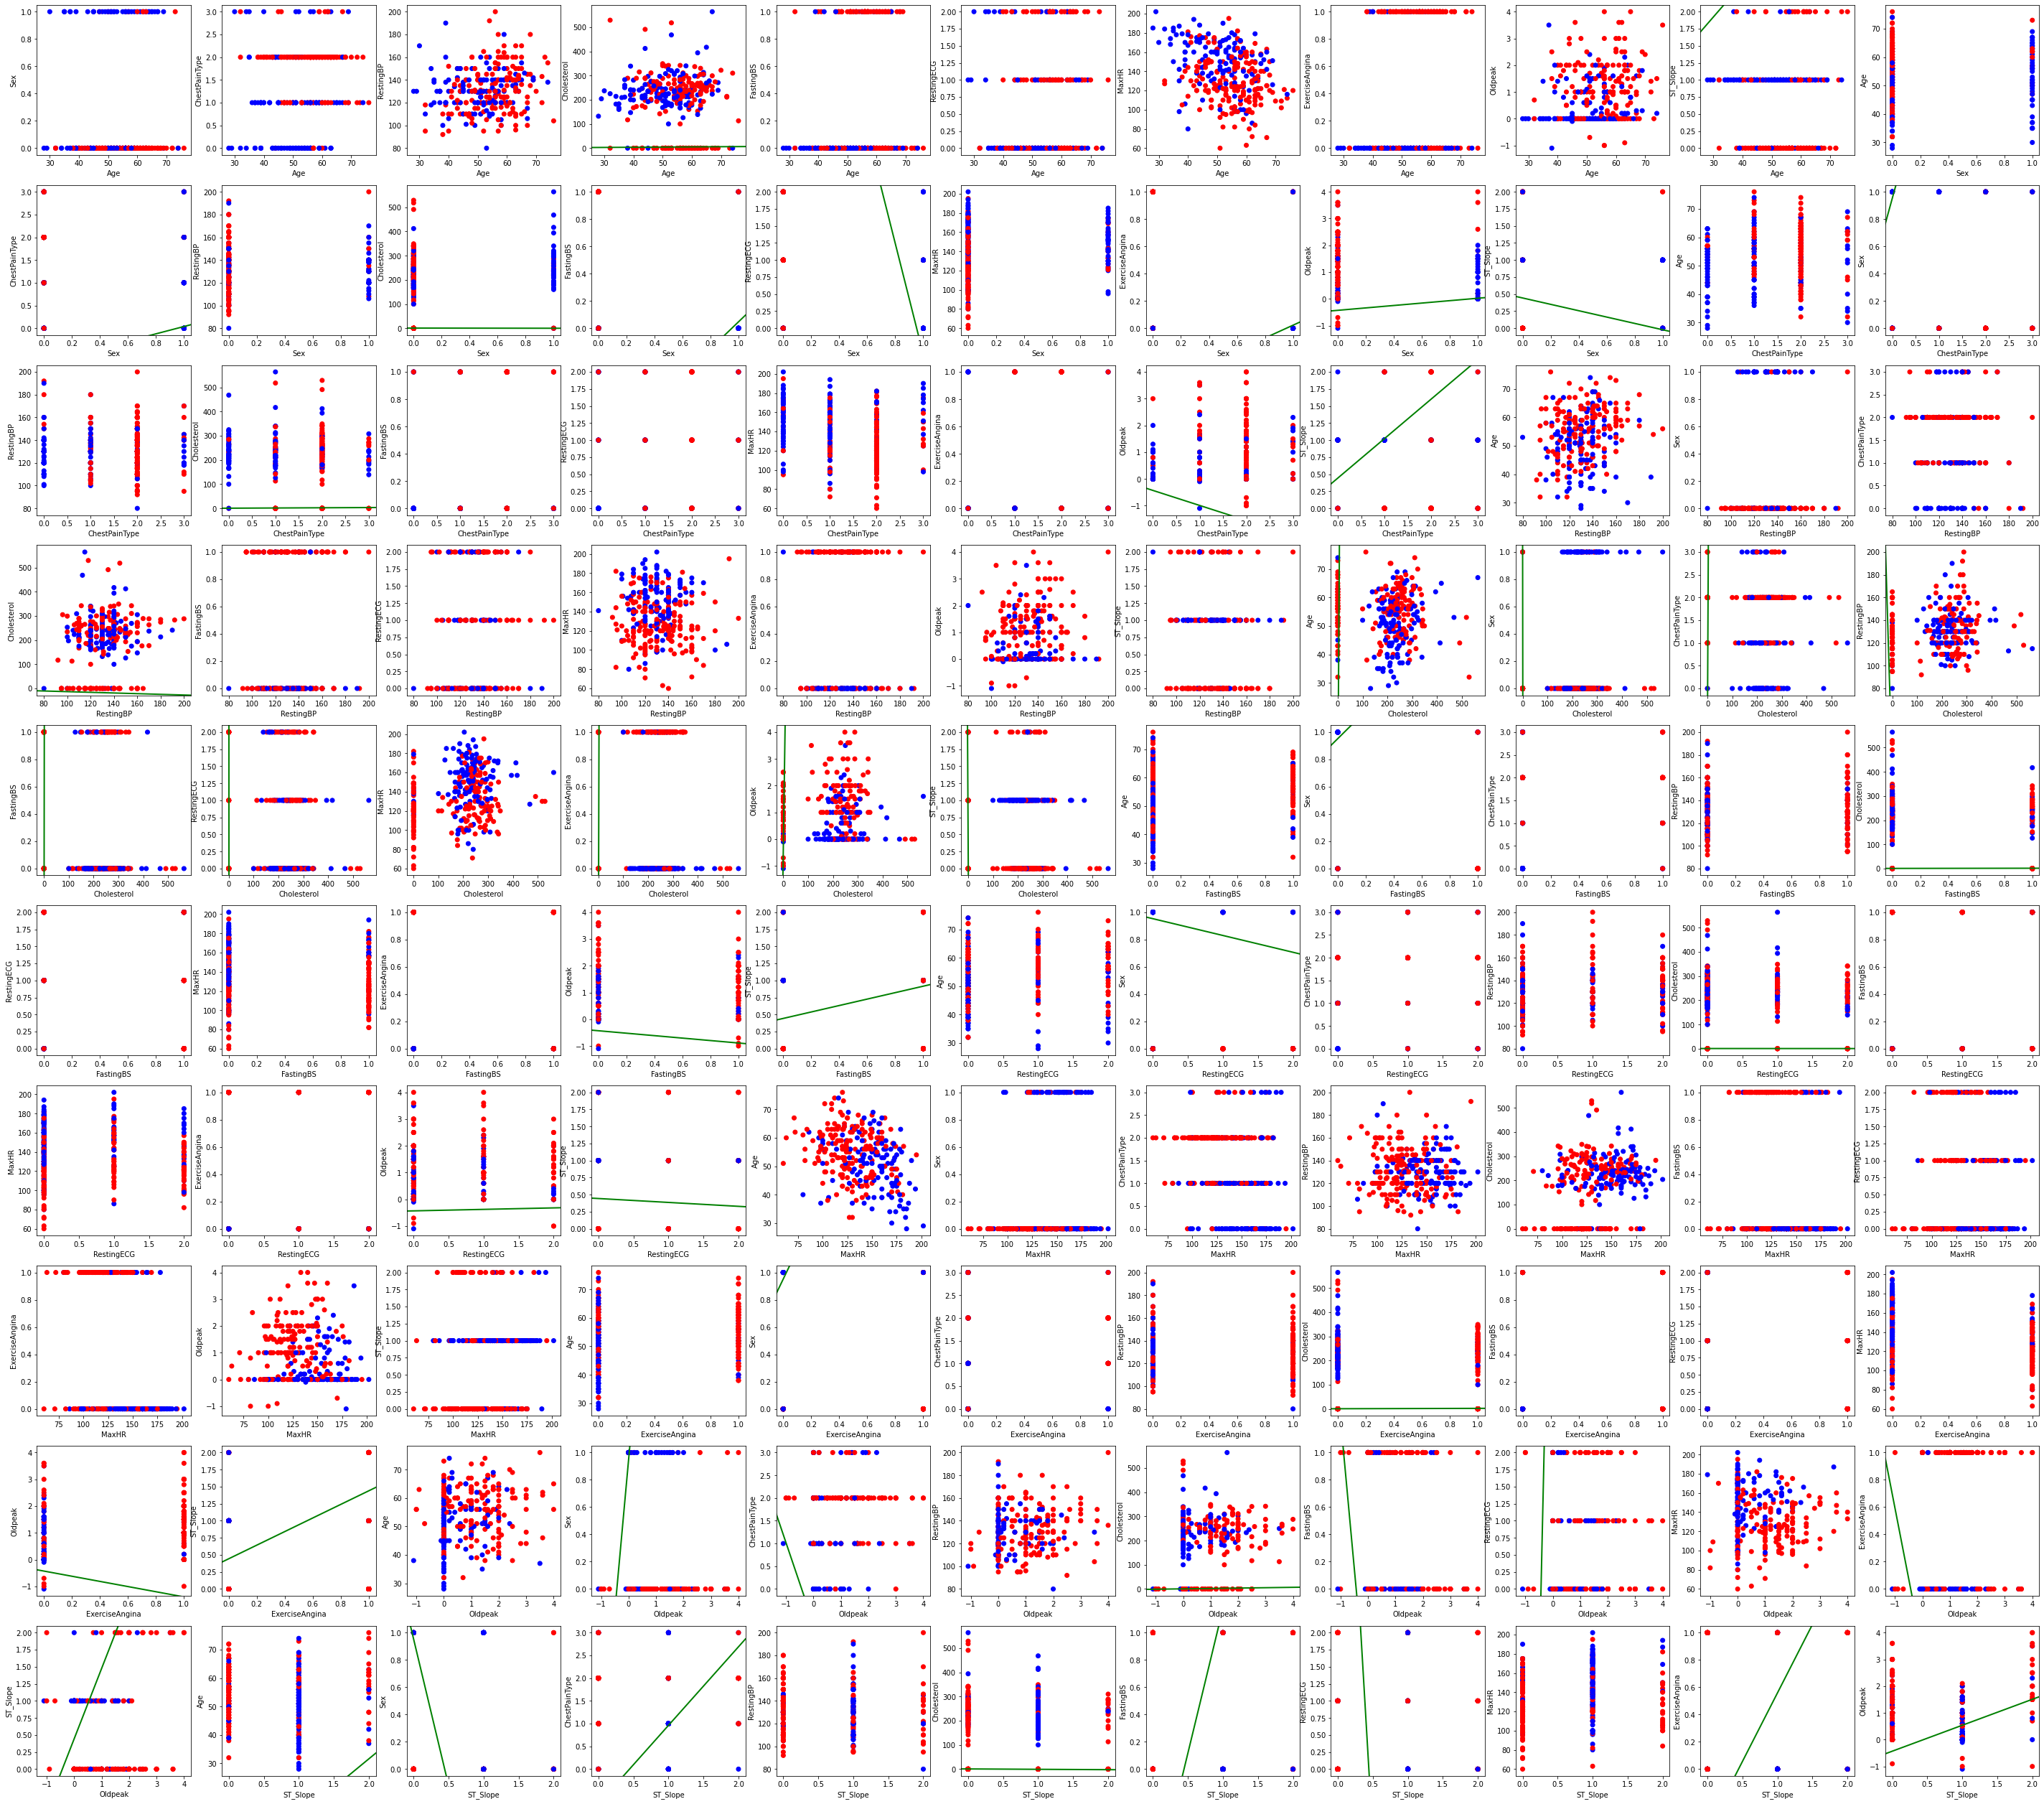

In [148]:
plot_separator_on_data(X_pre_val, y_pre_val, dataset, [], svm_model, "svc")

## PARTE 4

In questa parte andremo ad effettuare un confronto tra i tre modelli prima analizzati, ovvero:
- Perceptron;
- Logistic Regression;
- Support Vector Machine.

In [149]:
from scipy import stats

Il seguente metodo permette di confrontare i diversi modelli con intervallo di confidenza al 95%.

In [150]:
def difference_between_two_models(error1, error2, confidence, dataset, y_val):
    z_half_alfa = stats.norm.ppf(confidence)
    variance = (((1 - error1) * error1) / len(y_val)) + (((1 - error2) * error2) / len(y_val))
    d_minus = abs(error1 - error2) - z_half_alfa * (pow(variance, 0.5))
    d_plus = abs(error1 - error2) + z_half_alfa * (pow(variance, 0.5))
    print("Valore minimo: {}\nValore massimo: {}\n".format(d_minus, d_plus))

per_error = 1 - models["Perceptron1"]["Score"]
lre_error = 1 - models["Logistic Regression1"]["Score"]
svm_error = 1 - models["Support Vector Machine"]["Score"]

print("Support Vector Machine vs Logistic Regression, intervallo di confidenza:")
difference_between_two_models(svm_error, lre_error, 0.95, dataset, y_pre_val)

print("Support Vector Machine vs Perceptron, intervallo di confidenza:")
difference_between_two_models(svm_error, per_error, 0.95, dataset, y_pre_val)

print("Logistic Regression vs Perceptron, intervallo di confidenza:")
difference_between_two_models( lre_error, per_error, 0.95, dataset, y_pre_val)


Support Vector Machine vs Logistic Regression, intervallo di confidenza:
Valore minimo: -0.0422297161250747
Valore massimo: 0.054408077131504584

Support Vector Machine vs Perceptron, intervallo di confidenza:
Valore minimo: 0.019953336569398572
Valore massimo: 0.12372783412663757

Logistic Regression vs Perceptron, intervallo di confidenza:
Valore minimo: 0.013509001677223034
Valore massimo: 0.11799380801238323



Si evince una somiglianza tra Support Vector Machine e Logistic Regression, come si evidenzia anche dalla misura del f1_measure effettuata in precedenza.

In [151]:
print("F1_measure Perceptron:", models["Perceptron1"]["Score"])
print("F1_measure Logistic Regression: ", models["Logistic Regression1"]["Score"])
print("F1_measure Support Vector Machine: ", models["Support Vector Machine"]["Score"])


F1_measure Perceptron: 0.7746588693957115
F1_measure Logistic Regression:  0.8404102742405146
F1_measure Support Vector Machine:  0.8464994547437296


Dall'analisi precedente si vede che Support Vector Machine(f1_score=0.846) e Logistic Regression(f1_score=0.840) danno un risultato simile.

Come è noto la matrice di confusione è una tabella che descrive le prestazioni di un modello di classificazione su un insieme di dati di prova per i quali sono noti i valori reali.
Detto questo passiamo a generare le matrice di confusione dei diversi modelli, per fare una valutazione più profonda.

In [152]:
def confusion_matrix_calculation(model):
    return confusion_matrix(y_pre_val, model.predict(X_pre_val))


In [153]:
def confidence(acc, N, Z):
    den = (2*(N+Z**2))
    var = (Z*np.sqrt(Z**2+4*N*acc-4*N*acc**2)) / den
    a = (2*N*acc+Z**2) / den
    inf = a - var
    sup = a + var
    return (inf, sup)

def calculate_accuracy(conf_matrix):
    return np.diag(conf_matrix).sum() / conf_matrix.sum().sum()

In [154]:
conf_perc = pd.DataFrame(confusion_matrix_calculation(model))
conf_log_reg = pd.DataFrame(confusion_matrix_calculation(log_model))
conf_SVM = pd.DataFrame(confusion_matrix_calculation(svm_model))


In [70]:
#con confidenza del 0.95 si ha Z=1.96
pd.DataFrame([confidence(calculate_accuracy(conf_perc), len(X_pre_val), 1.96),
              confidence(calculate_accuracy(conf_log_reg), len(X_pre_val), 1.96),
              confidence(calculate_accuracy(conf_SVM), len(X_pre_val), 1.96)],
                 index=["perceptron", "logreg", "SVM"], columns=["inf", "sup"])

inf       sup
perceptron  0.727914  0.820754
logreg      0.798166  0.879600
SVM         0.805307  0.885368

Matrice di confusione del Perceptron.

In [71]:
model = Pipeline(steps=[('scaler', None),
                ('per',
                 Perceptron(alpha=0.1, class_weight={1: 5}, fit_intercept=False,
                            n_jobs=-1, penalty='l1', random_state=42))])

model.fit(X_pre_train, y_pre_train)
conf_perc = pd.DataFrame(confusion_matrix_calculation(model))
conf_perc

0    1
0  0  124
1  0  182

In [72]:
measureModel(X_pre_val, y_pre_val, model.predict(X_pre_val), model)

Accuracy: 0.5947712418300654

Precision fake heart disease: 0.5947712418300654

Precision real heartDisease: 0.0

Recall fake heartDisease: 1.0

Recall real HeartDisease: 0.0

f1_measure: 0.3729508196721311



Matrice di confusione del Logistic Regression.

In [73]:
conf_log_reg = pd.DataFrame(confusion_matrix_calculation(log_model))
conf_log_reg

0    1
0  109   15
1   33  149

In [74]:
measureModel(X_pre_val, y_pre_val, model.predict(X_pre_val), log_model)

Accuracy: 0.8431372549019608

Precision fake heart disease: 0.5947712418300654

Precision real heartDisease: 0.0

Recall fake heartDisease: 1.0

Recall real HeartDisease: 0.0

f1_measure: 0.3729508196721311



Matrice di confidenza Support Vector Machine.

In [75]:
conf_SVM = pd.DataFrame(confusion_matrix_calculation(svm_model))
conf_SVM

0    1
0  108   16
1   30  152

In [76]:
measureModel(X_pre_val, y_pre_val, model.predict(X_pre_val), svm_model)

Accuracy: 0.8496732026143791

Precision fake heart disease: 0.5947712418300654

Precision real heartDisease: 0.0

Recall fake heartDisease: 1.0

Recall real HeartDisease: 0.0

f1_measure: 0.3729508196721311



Adesso vengono calcolati gli intervalli di confidenza al 95% per ogni modello.

In [77]:
def confidence(acc, N, Z):
    den = (2*(N+Z**2))
    var = (Z*np.sqrt(Z**2+4*N*acc-4*N*acc**2)) / den
    a = (2*N*acc+Z**2) / den
    inf = a - var
    sup = a + var
    return (inf, sup)

def calculate_accuracy(conf_matrix):
    return np.diag(conf_matrix).sum() / conf_matrix.sum().sum()

In [78]:
#con confidenza del 0.95 si ha Z=1.96
pd.DataFrame([confidence(calculate_accuracy(conf_perc), len(X_pre_val), 1.96),
              confidence(calculate_accuracy(conf_log_reg), len(X_pre_val), 1.96),
              confidence(calculate_accuracy(conf_SVM), len(X_pre_val), 1.96)],
                 index=["perceptron", "logreg", "SVM"], columns=["inf", "sup"])

inf       sup
perceptron  0.538918  0.648274
logreg      0.798166  0.879600
SVM         0.805307  0.885368

Dall'analisi degli intervalli di confidenza al 95% abbiamo conferma che il Support Vector Machine è il modello più accurato.

Possiamo confrontare le rette create utilizzando i tre differenti modelli:
- linea blu: Perceptron
- linea viola: Regressione Logistica
- linea verde: Support Vector Machine

In [79]:
hidden = [2,3,4,5,6,7]

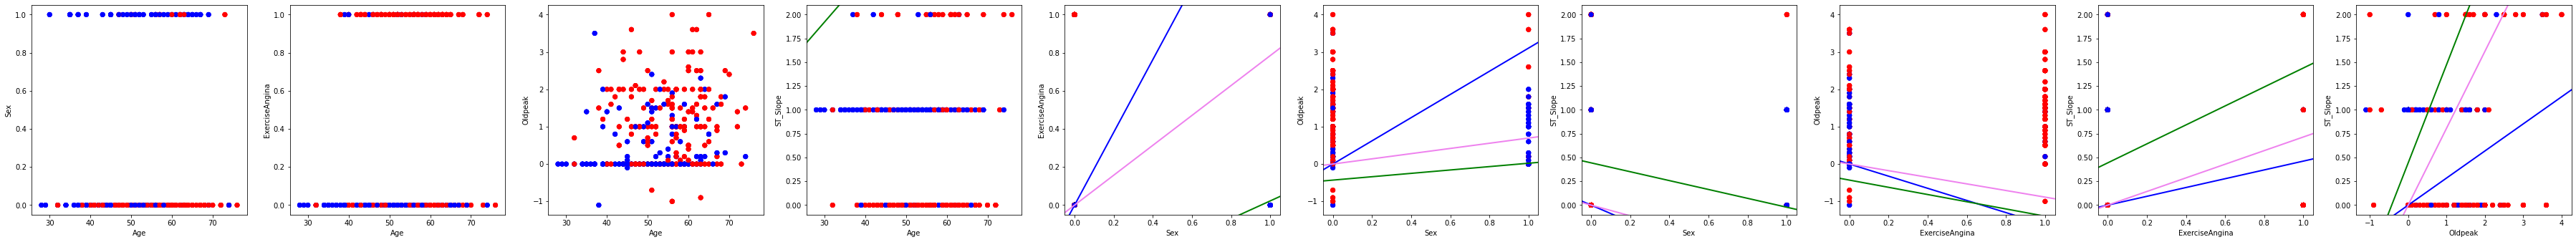

In [80]:
plt.figure(figsize=(70, 70))
plot_separator_on_data(X_pre_val, y_pre_val, dataset ,hidden, models["Perceptron1"]["Model"], "per", repeatCombination=False, newFig = False, lineColor="blue")
plot_separator_on_data(X_pre_val, y_pre_val, dataset ,hidden, models["Logistic Regression1"]["Model"], "lr", repeatCombination=False, newFig = False, lineColor="violet")
plot_separator_on_data(X_pre_val, y_pre_val, dataset ,hidden, models["Support Vector Machine"]["Model"], "svc", repeatCombination=False, newFig = False, lineColor="green")


Ricordiamo che, dalla misura dell'f1_measure, il modello migliore è il Support Vector Machine, seguito da Regressione Logistica e da Perceptron.
Di seguito un grafico tridimensionale che rappresenta il piano ottenuto con SVM.

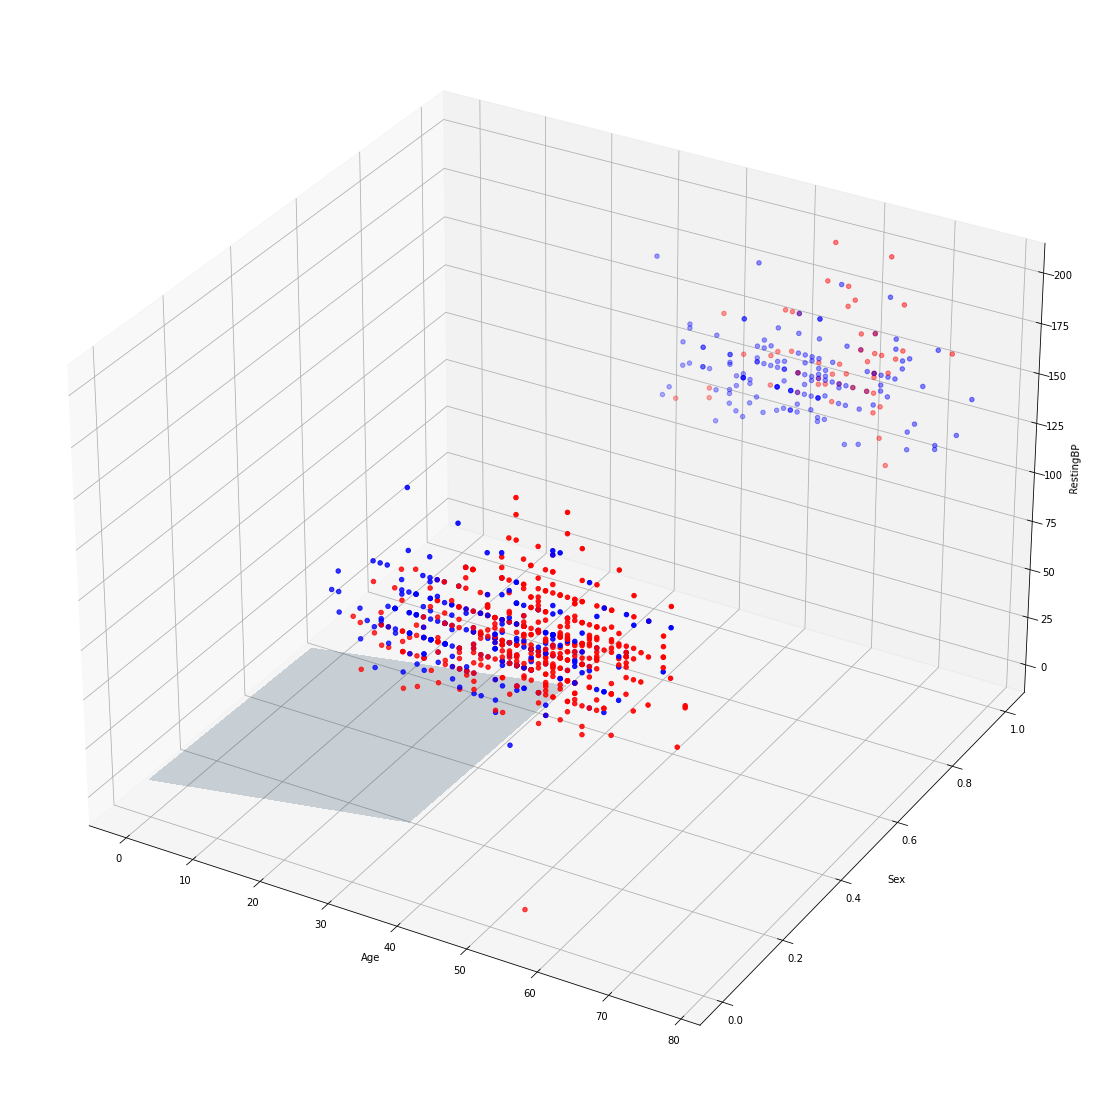

In [177]:
fig = plt.figure(figsize=(20, 20))
ax = fig.gca(projection='3d')

tmp = dataset
xi = 0
yi = 1
zi = 3
x = tmp.columns[xi]
y = tmp.columns[yi]
z = tmp.columns[zi]

noHeartStroke = "HeartDisease"
ax.set_xlabel(x)
ax.set_ylabel(y)
ax.set_zlabel(z)

account_colors= tmp[noHeartStroke].map(account_color_map)

ax.scatter(tmp[x], tmp[y], tmp[z], c=account_colors)
xlim, ylim = plt.xlim(), plt.ylim()

X = np.arange(0, tmp[x].max(), tmp[x].max()/2)
Y = np.arange(0,tmp[y].max(), tmp[y].max()/2)
X, Y = np.meshgrid(X, Y)
Z = separator_3d(svm_model, X, Y,'svc',xi,yi,zi)

Z = np.asarray(Z).reshape(-1, 2)

surf = ax.plot_surface(X,Y,Z, linewidth=0, antialiased=False, alpha = 0.2)
plt.show()

## PARTE 5


Si effettua uno studio sui coefficienti del modello che ha restituito il miglior risultato: support vector machine.

In [156]:
svm_model = Pipeline(steps=[('scaler', StandardScaler()),
                ('svc', SVC(C=1000.0, kernel='linear', random_state=42))])
svm_model.fit(X_pre_train, y_pre_train)
svm_model_coeff = get_coefficients(svm_model, X_pre_train.columns, 'svc')
svm_model_coeff

Age               0.026012
Sex              -0.245989
ChestPainType     0.305622
RestingBP        -0.048210
Cholesterol      -0.347536
FastingBS         0.249535
RestingECG       -0.030250
MaxHR            -0.223420
ExerciseAngina    0.525976
Oldpeak           0.544782
ST_Slope         -0.528131
dtype: float64

In [166]:
min_values = dataset.min()
max_values = dataset.max()
denormalized_df= svm_model_coeff * (max_values - min_values) + min_values
denormalized_df

Age                29.274607
ChestPainType       0.916866
Cholesterol      -209.564075
ExerciseAngina      0.525976
FastingBS           0.249535
HeartDisease             NaN
MaxHR              28.274403
Oldpeak             2.194084
RestingBP          -9.642045
RestingECG         -0.060499
ST_Slope           -1.056261
Sex                -0.245989
dtype: float64

A seguito della denormalizzazione, si nota, dallo studio dei coefficienti, che alcune variabili vengono azzerate.
Quella più rilevante è il colesterolo, seguito da età e maxHR.
Ci si aspetta quindi che un paziente con un colesterolo alto, un'età ed una frequenza cardiaca massima elevata sia affetto da cardiopatia.